In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Step 1: Load the Ultrasound Image
image = cv2.imread(
    "../../data/malignant_breast_cancer.png", 
    cv2.IMREAD_GRAYSCALE
)

In [10]:
sharpening_kernel1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpening_kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sharpened_image1 = cv2.filter2D(image, -1, sharpening_kernel1)
sharpened_image2 = cv2.filter2D(image, -1, sharpening_kernel2)

(np.float64(-0.5), np.float64(448.5), np.float64(597.5), np.float64(-0.5))

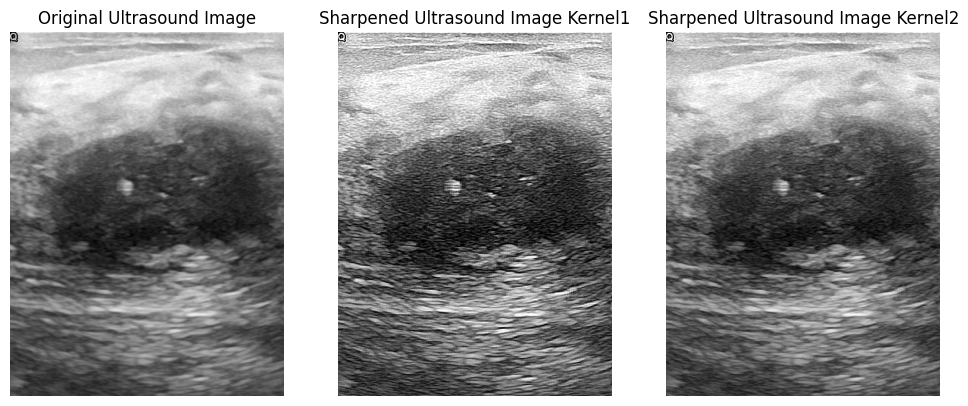

In [11]:
# Step 4: Display the Original and Sharpened Images Side-by-Side
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Ultrasound Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sharpened Ultrasound Image Kernel1")
plt.imshow(sharpened_image1, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sharpened Ultrasound Image Kernel2")
plt.imshow(sharpened_image2, cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(448.5), np.float64(597.5), np.float64(-0.5))

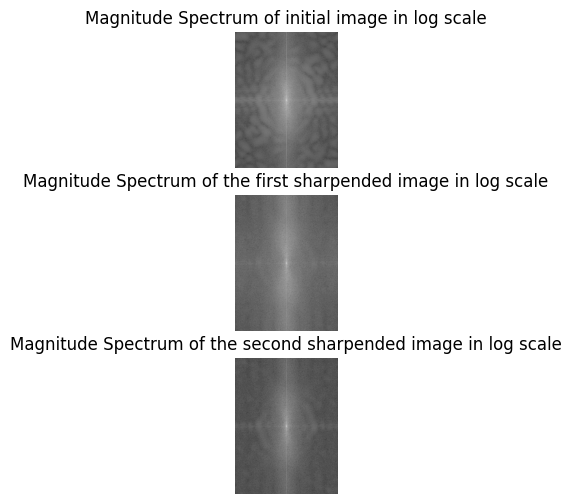

In [12]:
dft1 = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)
magnitude_spectrum1 = 20 * np.log(cv2.magnitude(dft_shift1[:, :, 0], dft_shift1[:, :, 1]))

dft2 = cv2.dft(np.float32(sharpened_image1), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)
magnitude_spectrum2 = 20 * np.log(
    cv2.magnitude(dft_shift2[:, :, 0], dft_shift2[:, :, 1])
)

dft3 = cv2.dft(np.float32(sharpened_image2), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift3 = np.fft.fftshift(dft3)
magnitude_spectrum3 = 20 * np.log(
    cv2.magnitude(dft_shift3[:, :, 0], dft_shift3[:, :, 1])
)


plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.title("Magnitude Spectrum of initial image in log scale")
plt.imshow(magnitude_spectrum1, cmap="gray")
plt.axis("off")

plt.subplot(3, 1, 2)
plt.title("Magnitude Spectrum of the first sharpended image in log scale")
plt.imshow(magnitude_spectrum2, cmap="gray")
plt.axis("off")

plt.subplot(3, 1, 3)
plt.title("Magnitude Spectrum of the second sharpended image in log scale")
plt.imshow(magnitude_spectrum3, cmap="gray")
plt.axis("off")

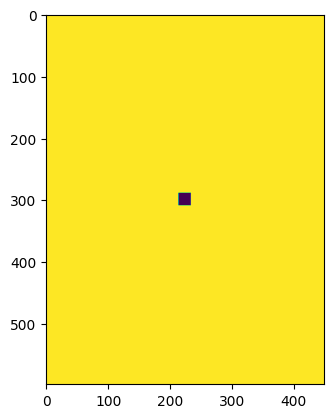

In [13]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Coordenadas del centro

# Crear una máscara pasa-altas
# Empezamos con una matriz de unos
mask = np.ones((rows, cols, 2), np.uint8)

# Crear una región cuadrada en el centro de la máscara que representa las bajas frecuencias
r = 10  # Radio de la región de bajas frecuencias que queremos eliminar
mask[crow - r : crow + r, ccol - r : ccol + r] = (
    0  # Zona central donde eliminamos las bajas frecuencias
)

plt.imshow(mask[:,:,1])

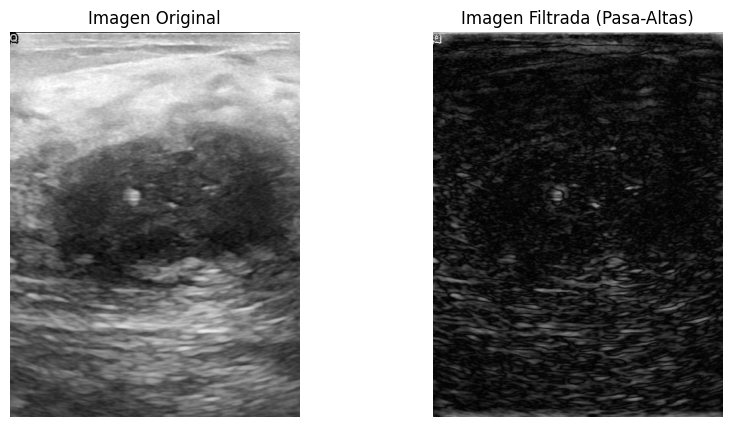

In [14]:
# Aplicar la máscara pasa-altas al espectro DFT
fshift = dft_shift1 * mask

# Desplazar de vuelta las frecuencias (inverso de fftshift)
f_ishift = np.fft.ifftshift(fshift)

# Aplicar la transformada inversa de Fourier (IDFT)
img_back = cv2.idft(f_ishift)

# Calcular la magnitud para obtener la imagen final filtrada
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# Mostrar las imágenes original y filtrada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap="gray")
plt.title("Imagen Filtrada (Pasa-Altas)")
plt.axis("off")

plt.show()